# supervisado 
* Utilizar KNN
* Utilizar Crear nuestro modelo de regresion

In [ ]:
! pip install numpy==1.23 pandas==0.25.3 plotly scipy statsmodels==0.13.2

  Using cached pandas-0.25.3.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done

In [216]:
import numpy as np
import os
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tarfile
import zipfile
from sklearn.cluster import AgglomerativeClustering
from scipy.io import loadmat
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from os.path import isfile, isdir
import plotly.figure_factory as ff
import plotly.express as px
import statsmodels.api as sm
from IPython.display import Image 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [217]:
global static_img
static_img=True
def display_static(fig):
    if static_img:
        return Image(fig.to_image(format="png"))
    else:
        return fig
    

## REGRESION
* Una variable
* Crear dummy variables
* Utilizar muchas variables







In [218]:
df = pd.read_csv("data/CARS.csv")
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [219]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,C240 4dr,Sedan,Asia,Front,"$33,995",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


### Predict utilizando el algoritmo de los vecinos KNN
Utilizar 4 vecinos para predecir el consumo de gasolina de millas por galon

In [220]:
x = df[['EngineSize']]
y = df['MPG_City']
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
for n in range(1,10):
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(x_train, y_train)
    y_hat_train = neigh.predict(x_train)
    y_hat = neigh.predict(x_test)
    print(F" error training KN{n} {np.mean(np.power(y_train - y_hat_train,2))}")
    print(F" error test KN{n} {np.mean(np.power(y_test - y_hat,2))}")

 error training KN1 11.634502923976608
 error test KN1 17.77906976744186
 error training KN2 10.178362573099415
 error test KN2 12.386627906976743
 error training KN3 9.604938271604938
 error test KN3 11.695090439276486
 error training KN4 9.834612573099415
 error test KN4 11.303052325581396
 error training KN5 9.462105263157895
 error test KN5 11.091162790697677
 error training KN6 9.484974009096813
 error test KN6 10.929909560723514
 error training KN7 9.536877909058362
 error test KN7 10.96701471286189
 error training KN8 9.61280153508772
 error test KN8 10.892441860465116
 error training KN9 9.600425962024403
 error test KN9 10.670255526844674


## Regresion

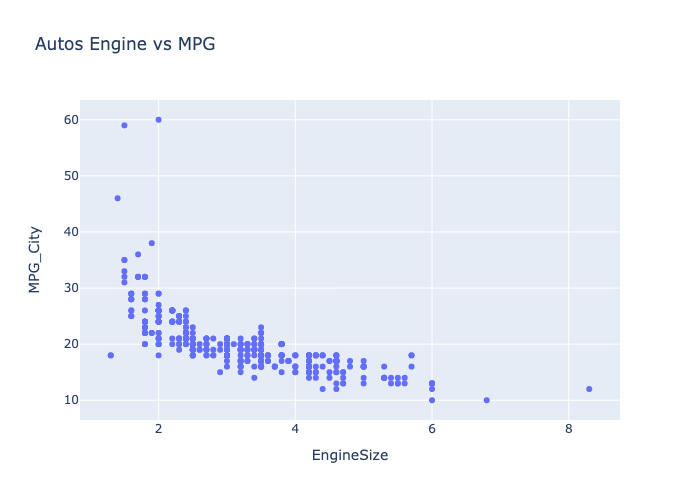

In [7]:
fig = px.scatter(df[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG"
                )
display_static(fig)

In [9]:
#define response variable
y = df['MPG_City']

#define predictor variables
x = df[['EngineSize']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               MPG_City   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     431.7
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           9.86e-67
Time:                        18:38:12   Log-Likelihood:                -1165.8
No. Observations:                 428   AIC:                             2336.
Df Residuals:                     426   BIC:                             2344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7772      0.546     56.388      0.0

In [10]:
x = list(range(0,9))
y_hat = [ -3.3523*x_i + 30.7772 for x_i in x]

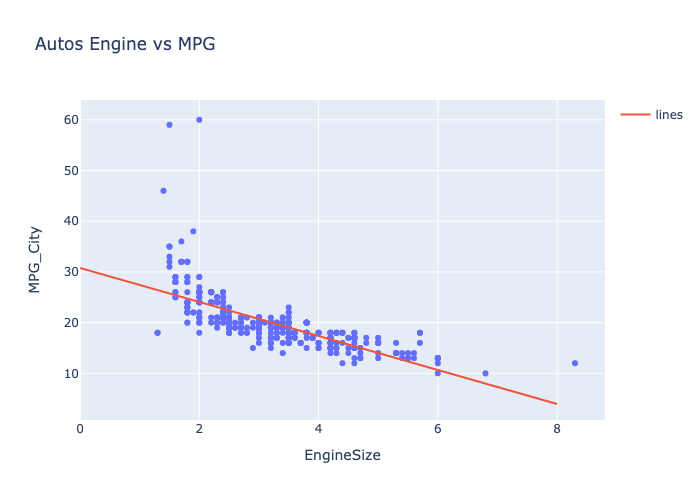

In [11]:
fig = px.scatter(df[["EngineSize","MPG_City"]], x="EngineSize", y="MPG_City", 
                 title="Autos Engine vs MPG")
fig.add_trace(go.Scatter(x=x, y=y_hat,
                    mode='lines',
                    name='lines'))
display_static(fig)

In [14]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [15]:
df['Make'].value_counts()


Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Honda            17
Nissan           17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Volvo            12
Hyundai          12
Jaguar           12
Kia              11
Lexus            11
Mazda            11
Subaru           11
Pontiac          11
Mercury           9
Buick             9
Lincoln           9
GMC               8
Suzuki            8
Saturn            8
Infiniti          8
Cadillac          8
Porsche           7
Saab              7
Acura             7
Jeep              3
Land Rover        3
Oldsmobile        3
Scion             2
MINI              2
Isuzu             2
Hummer            1
Name: Make, dtype: int64

In [16]:
df_x = pd.get_dummies(df[['Type','Origin','DriveTrain']],
                      prefix=['Type','Origin','DriveTrain'],
                      dummy_na=True, drop_first=True)

In [17]:
df_x = pd.concat((df_x, df), axis=1)

In [18]:
cols = [c for c in df_x.columns if c.startswith("Type_") or c.startswith("Origin_") or c.startswith("DriveTrain_")]

In [19]:
cols = cols + ["Invoice","EngineSize","Cylinders","Horsepower","Weight","Wheelbase","Length","MPG_Highway"]

In [20]:
df_x.head(10)

,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Type_nan,Origin_Europe,Origin_USA,Origin_nan,DriveTrain_Front,DriveTrain_Rear,DriveTrain_nan,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,1,0,0,0,0,0,0,0,0,0,0,0,Acura,MDX,SUV,Asia,All,"$36,945",33337.0,3.5,6.0,265,17,23,4451,106,189
1,0,1,0,0,0,0,0,0,0,1,0,0,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820",21761.0,2.0,4.0,200,24,31,2778,101,172
2,0,1,0,0,0,0,0,0,0,1,0,0,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990",24647.0,2.4,4.0,200,22,29,3230,105,183
3,0,1,0,0,0,0,0,0,0,1,0,0,Acura,TL 4dr,Sedan,Asia,Front,"$33,195",30299.0,3.2,6.0,270,20,28,3575,108,186
4,0,1,0,0,0,0,0,0,0,1,0,0,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755",39014.0,3.5,6.0,225,18,24,3880,115,197
5,0,1,0,0,0,0,0,0,0,1,0,0,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100",41100.0,3.5,6.0,225,18,24,3893,115,197
6,0,0,1,0,0,0,0,0,0,0,1,0,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765",79978.0,3.2,6.0,290,17,24,3153,100,174
7,0,1,0,0,0,0,1,0,0,1,0,0,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940",23508.0,1.8,4.0,170,22,31,3252,104,179
8,0,1,0,0,0,0,1,0,0,1,0,0,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940",32506.0,1.8,4.0,170,23,30,3638,105,180
9,0,1,0,0,0,0,1,0,0,1,0,0,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840",28846.0,3.0,6.0,220,20,28,3462,104,179


In [21]:
df_x = df_x[cols].fillna(0)

In [22]:
#define response variable
y = df_x['MPG_Highway']
x = df_x[cols]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            MPG_Highway   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.300e+28
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:38:56   Log-Likelihood:                 11817.
No. Observations:                 428   AIC:                        -2.360e+04
Df Residuals:                     410   BIC:                        -2.353e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.776e-14   4.47e-13  